In [1]:
!pip install prophet

In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv(r"C:\Users\ejanv\Desktop\Eskwelabs\Capstone\csv\consolidated_csv_01BURGOS_G01_1.csv")

In [5]:
# transform date column into a datetime column
df['RUN_TIME'] = pd.to_datetime(df['RUN_TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df = df.set_index('RUN_TIME')
df.head()

,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
RUN_TIME,,,,,,,,,,
NaT,RTD,CLUZ,NLUZON,01BURGOS_G01,12/26/2022 12:05:00 AM,12/26/2022,12/26/2022 12:05:00 AM,EBWPC,98.0,NaN
2022-12-26 00:05:00,RTD,CLUZ,NLUZON,01BURGOS_G01,12/26/2022 12:10:00 AM,12/26/2022 12:05:00 AM,12/26/2022 12:10:00 AM,EBWPC,97.0,NaN
2022-12-26 00:10:00,RTD,CLUZ,NLUZON,01BURGOS_G01,12/26/2022 12:15:00 AM,12/26/2022 12:10:00 AM,12/26/2022 12:15:00 AM,EBWPC,96.0,NaN
2022-12-26 00:15:00,RTD,CLUZ,NLUZON,01BURGOS_G01,12/26/2022 12:20:00 AM,12/26/2022 12:15:00 AM,12/26/2022 12:20:00 AM,EBWPC,112.0,NaN
2022-12-26 00:20:00,RTD,CLUZ,NLUZON,01BURGOS_G01,12/26/2022 12:25:00 AM,12/26/2022 12:20:00 AM,12/26/2022 12:25:00 AM,EBWPC,112.0,NaN


In [80]:
data = df[['SELF_SCHED_MW']]
data = data.asfreq(freq='5T') # Add to complete dates
data

,SELF_SCHED_MW
RUN_TIME,
2022-12-26 00:05:00,97.0
2022-12-26 00:10:00,96.0
2022-12-26 00:15:00,112.0
2022-12-26 00:20:00,112.0
2022-12-26 00:25:00,111.0
...,...
2023-09-25 23:35:00,2.0
2023-09-25 23:40:00,2.0
2023-09-25 23:45:00,2.0


<Axes: xlabel='RUN_TIME'>

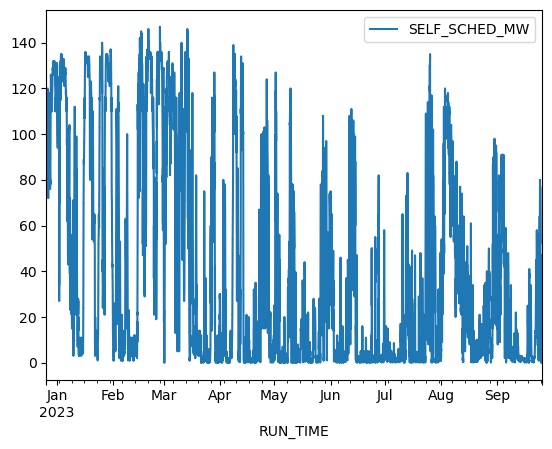

In [7]:
data['SELF_SCHED_MW'] = data['SELF_SCHED_MW'].fillna(method='ffill')
data[['SELF_SCHED_MW']].plot()

In [8]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.01, False)

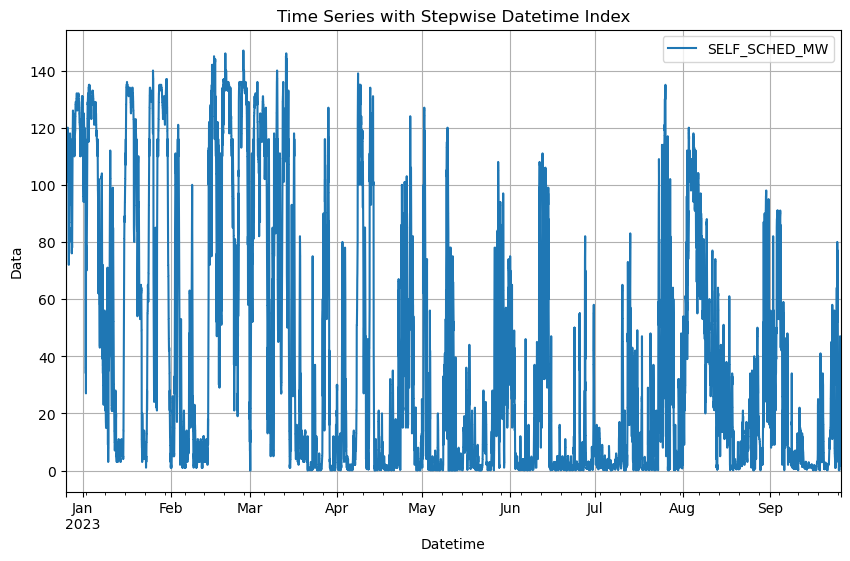

In [9]:
# Plot the time series while preserving the stepwise format
data.plot(figsize=(10, 6))
plt.title('Time Series with Stepwise Datetime Index')
plt.xlabel('Datetime')
plt.ylabel('Data')
plt.grid(True)
plt.show()

In [10]:
# train_data = data[:round(len(data)*0.7)]
# test_data = data[round(len(data)*0.7):]
# plt.plot(train_data)
# plt.plot(test_data)

In [11]:
# train_data

In [12]:
# test_data

## Trial Prophet

In [13]:
# train_data.reset_index(inplace=True)
# train_data = train_data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})
# train_data

In [14]:
# test_data.reset_index(inplace=True)
# test_data = test_data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})
# test_data

In [15]:
# from prophet import Prophet

# model = Prophet()
# model.fit(train_data[['ds', 'y']])

In [16]:
# future_dates = model.make_future_dataframe(periods=len(test_data))
# forecast = model.predict(future_dates)

In [17]:
# y_true = test_data['y'].values
# y_pred = forecast[-len(test_data):]['yhat'].values

In [18]:
# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def root_mean_squared_error(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def show_errors(y_true, y_pred):
#     return pd.DataFrame({'RMSE': root_mean_squared_error(y_true, y_pred),
#                          'MAE': mean_absolute_error(y_true, y_pred),
#                          'MAPE': mean_absolute_percentage_error(y_true, y_pred)}, index=[0])

In [19]:
# errors = show_errors(y_true, y_pred)
# print(errors)

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Function to plot actual vs predicted values
# def plot_actual_vs_predicted(y_true, y_pred):
#     plt.figure(figsize=(12, 6))
#     plt.plot(y_true, label='Actual Power', marker='o')
#     plt.plot(y_pred, label='Predicted Power', marker='o')
#     plt.title('Actual vs Predicted Power Generation')
#     plt.xlabel('Time')
#     plt.ylabel('Power Generation')
#     plt.legend()
#     plt.show()

# # Function to plot error metrics
# def plot_error_metrics(errors):
#     plt.figure(figsize=(8, 5))
#     sns.barplot(x=errors.columns, y=errors.values[0])
#     plt.title('Error Metrics')
#     plt.xlabel('Metrics')
#     plt.ylabel('Value')
#     plt.show()

# # Assuming you've already calculated errors and have y_true, y_pred
# plot_actual_vs_predicted(y_true, y_pred)
# plot_error_metrics(errors)


In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Function to plot actual vs predicted values
# def plot_actual_vs_predicted(train_data, test_data, y_pred):
#     plt.figure(figsize=(12, 6))
    
#     # Plot training data
#     plt.plot(train_data['ds'], train_data['y'], label='Training Data')

#     # Plot actual and predicted values for the test set
#     plt.plot(test_data['ds'], test_data['y'], label='Actual Power')
#     plt.plot(test_data['ds'], y_pred, label='Predicted Power')

#     plt.title('Actual vs Predicted Power Generation')
#     plt.xlabel('Time')
#     plt.ylabel('Power Generation')
#     plt.legend()
#     plt.show()

# # Function to plot error metrics
# def plot_error_metrics(errors):
#     plt.figure(figsize=(8, 5))
#     sns.barplot(x=errors.columns, y=errors.values[0])
#     plt.title('Error Metrics')
#     plt.xlabel('Metrics')
#     plt.ylabel('Value')
#     plt.show()

# # Assuming you've already calculated errors and have train_df, test_df, and y_pred
# plot_actual_vs_predicted(train_data, test_data, y_pred)
# plot_error_metrics(errors)


## LSTM trial

In [22]:
data1 = data.values.reshape(-1,1)
data1

array([[ 97.],
       [ 96.],
       [112.],
       ...,
       [  2.],
       [  2.],
       [  2.]])

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data1)
data_scaled

array([[0.65986395],
       [0.65306122],
       [0.76190476],
       ...,
       [0.01360544],
       [0.01360544],
       [0.01360544]])

In [24]:
def create_sequences(data1, sequence_length):
    sequences = []
    for i in range(len(data1) - sequence_length):
        sequence = data1[i:i+sequence_length]
        target = data1[i+sequence_length]
        sequences.append((sequence, target))
    return sequences

sequence_length = 10  # You can adjust this based on your preference
sequences = create_sequences(data_scaled, sequence_length)

# Convert the sequences to NumPy arrays
X, y = zip(*sequences)
X, y = np.array(X), np.array(y)

In [25]:
split = int(0.7 * len(sequences))  # 70% for training, 30% for testing

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32)




Epoch 1/50

1726/1726 [==============================] - 15s 6ms/step - loss: 0.0043
Epoch 2/50
1726/1726 [==============================] - 11s 7ms/step - loss: 5.6523e-04
Epoch 3/50
1726/1726 [==============================] - 11s 6ms/step - loss: 4.5797e-04
Epoch 4/50
1726/1726 [==============================] - 10s 6ms/step - loss: 4.0671e-04
Epoch 5/50
1726/1726 [==============================] - 10s 6ms/step - loss: 3.9293e-04
Epoch 6/50
1726/1726 [==============================] - 10s 6ms/step - loss: 3.9125e-04
Epoch 7/50
1726/1726 [==============================] - 13s 8ms/step - loss: 3.8276e-04
Epoch 8/50
1726/1726 [==============================] - 13s 8ms/step - loss: 3.8333e-04
Epoch 9/50
1726/1726 [==============================] - 12s 7ms/step - loss: 3.8154e-04
Epoch 10/50
1726/1726 [==============================] - 11s 6ms/step - loss: 3.7821e-04
Epoch 11/50
1726/1726 [==============================] - 8s 5ms/step - loss: 3.7713e-04
Epoch 12/50
1726/1726 [========

In [27]:
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_original_scale = scaler.inverse_transform(predictions)


740/740 [==============================] - 2s 3ms/step


In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.022594972564620324


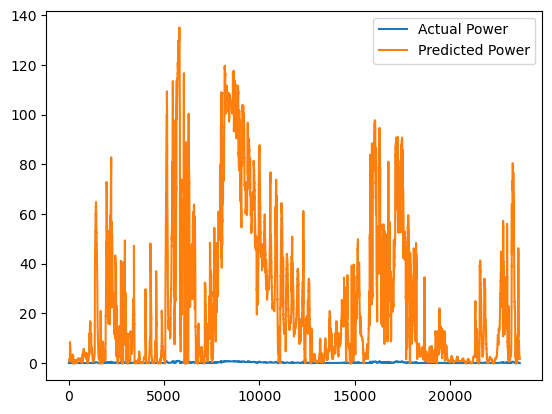

In [29]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual Power')
plt.plot(predictions_original_scale, label='Predicted Power')
plt.legend()
plt.show()


In [30]:
y_test

array([[0.00680272],
       [0.00680272],
       [0.00680272],
       ...,
       [0.01360544],
       [0.01360544],
       [0.01360544]])

# Prophet

In [31]:
data.reset_index(inplace=True)
data = data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})
data

,ds,y
0,2022-12-26 00:05:00,97.0
1,2022-12-26 00:10:00,96.0
2,2022-12-26 00:15:00,112.0
3,2022-12-26 00:20:00,112.0
4,2022-12-26 00:25:00,111.0
...,...,...
78906,2023-09-25 23:35:00,2.0
78907,2023-09-25 23:40:00,2.0
78908,2023-09-25 23:45:00,2.0
78909,2023-09-25 23:50:00,2.0


In [32]:
from prophet import Prophet

# Initialize the model
model1 = Prophet()

# Fit the model to your data
model1.fit(data)

18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:08:19 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future_dates1 = model1.make_future_dataframe(periods=30)
future_dates1.tail()

,ds
78936,2023-10-21 23:55:00
78937,2023-10-22 23:55:00
78938,2023-10-23 23:55:00
78939,2023-10-24 23:55:00
78940,2023-10-25 23:55:00


In [34]:
forecast1 = model1.predict(future_dates1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
78936,2023-10-21 23:55:00,-27.498402,-160.114934,97.149382
78937,2023-10-22 23:55:00,-21.366369,-169.344257,123.275443
78938,2023-10-23 23:55:00,-17.726981,-172.371637,127.098970
78939,2023-10-24 23:55:00,-21.801086,-188.078944,139.683203
78940,2023-10-25 23:55:00,-24.583876,-196.903748,137.694930


In [35]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-12-26 00:05:00,117.445503,74.926054,155.883775,117.445503,117.445503,-1.967650,-1.967650,-1.967650,-3.983099,-3.983099,-3.983099,2.015449,2.015449,2.015449,0.0,0.0,0.0,115.477853
1,2022-12-26 00:10:00,117.441737,75.164623,153.419341,117.441737,117.441737,-2.002131,-2.002131,-2.002131,-4.047154,-4.047154,-4.047154,2.045023,2.045023,2.045023,0.0,0.0,0.0,115.439606
2,2022-12-26 00:15:00,117.437971,78.944799,155.086270,117.437971,117.437971,-2.035956,-2.035956,-2.035956,-4.110517,-4.110517,-4.110517,2.074561,2.074561,2.074561,0.0,0.0,0.0,115.402015
3,2022-12-26 00:20:00,117.434205,76.771513,158.314231,117.434205,117.434205,-2.069307,-2.069307,-2.069307,-4.173369,-4.173369,-4.173369,2.104062,2.104062,2.104062,0.0,0.0,0.0,115.364898
4,2022-12-26 00:25:00,117.430439,76.234745,153.313770,117.430439,117.430439,-2.102357,-2.102357,-2.102357,-4.235883,-4.235883,-4.235883,2.133526,2.133526,2.133526,0.0,0.0,0.0,115.328082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78936,2023-10-21 23:55:00,-18.635207,-160.114934,97.149382,-153.159467,113.177371,-8.863196,-8.863196,-8.863196,-3.852168,-3.852168,-3.852168,-5.011027,-5.011027,-5.011027,0.0,0.0,0.0,-27.498402
78937,2023-10-22 23:55:00,-19.470398,-169.344257,123.275443,-163.997595,119.596923,-1.895971,-1.895971,-1.895971,-3.852168,-3.852168,-3.852168,1.956197,1.956197,1.956197,0.0,0.0,0.0,-21.366369
78938,2023-10-23 23:55:00,-20.305589,-172.371637,127.098970,-175.320612,128.331576,2.578608,2.578608,2.578608,-3.852168,-3.852168,-3.852168,6.430776,6.430776,6.430776,0.0,0.0,0.0,-17.726981
78939,2023-10-24 23:55:00,-21.140780,-188.078944,139.683203,-180.386627,136.767822,-0.660306,-0.660306,-0.660306,-3.852168,-3.852168,-3.852168,3.191862,3.191862,3.191862,0.0,0.0,0.0,-21.801086


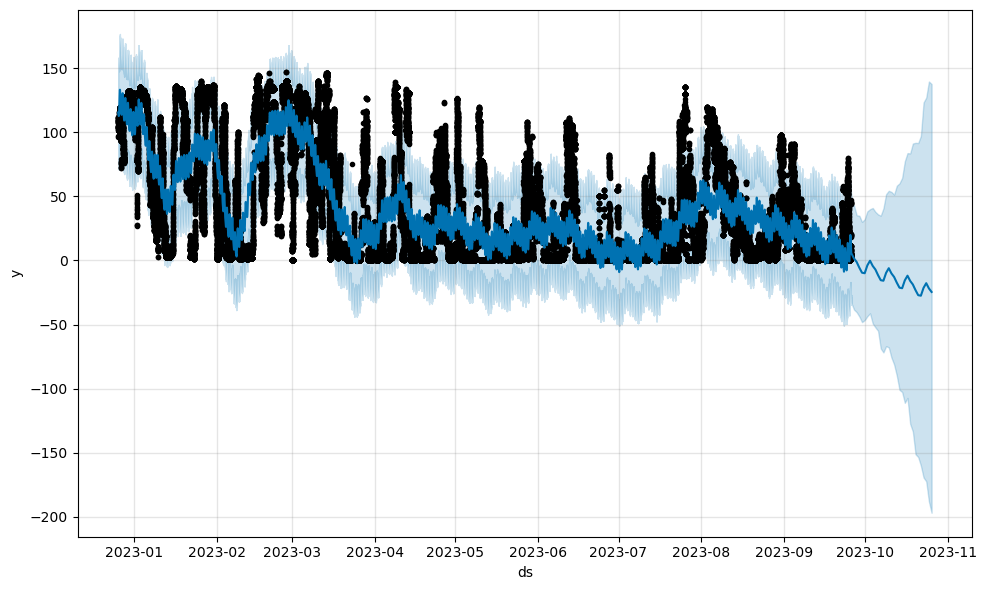

In [36]:
fig1 = model1.plot(forecast1)


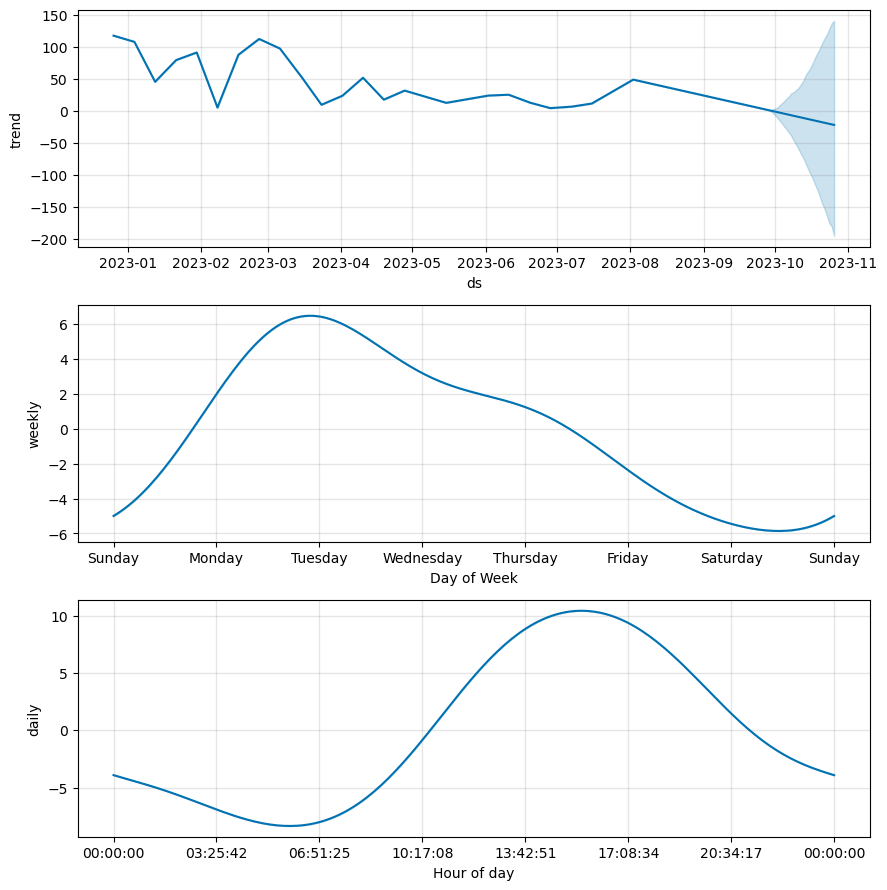

In [37]:
fig_components1 = model1.plot_components(forecast1)


## Plotly Prophet

### Super long and usually lags if noob laptop

In [38]:
# from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(model, forecast)

## Prophet with metrics 

In [39]:
# train_data.reset_index(inplace=True)
# train_data = train_data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})

In [40]:
# test_data.reset_index(inplace=True)
# test_data = test_data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})

In [41]:
# train_data

In [42]:
# model1 = Prophet()
# model1.fit(train_data)

In [43]:
# future_dates_train = model1.make_future_dataframe(periods=30)
# future_dates_train.tail()

In [44]:
# forecast1 = model1.predict(future_dates_train)
# forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [45]:
# fig_test = model1.plot(forecast1)


In [46]:
# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def root_mean_squared_error(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def show_errors(y_true, y_pred):
#     return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
#                                             'MAE':mean_absolute_error(y_true,y_pred),\
#                                             'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

In [47]:
# show_errors(test_data['y'], forecast1['yhat'])

In [48]:
# from sklearn.metrics import r2_score

# r2_score(test_data['y'], forecast1['yhat'])

# This part is the reference to Auto ARIMA model

In [49]:
# charts_df[charts_df.index.duplicated()]

In [50]:
# charts_df = charts_df[~charts_df.index.duplicated()]

In [51]:
# data = charts_df[['SELF_SCHED_MW']]
# data = data.asfreq(freq='5T') # Add to complete dates
# data

In [52]:
# data['SELF_SCHED_MW'] = data['SELF_SCHED_MW'].fillna(method='ffill')
# data[['SELF_SCHED_MW']].plot()

In [53]:
# from pmdarima.arima import ADFTest
# adf_test = ADFTest(alpha = 0.05)
# adf_test.should_diff(data)

In [54]:
# train_data = data[:round(len(data)*0.7)]
# test_data = data[round(len(data)*0.7):]
# plt.plot(train_data)
# plt.plot(test_data)

In [55]:
# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def root_mean_squared_error(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def show_errors(y_true, y_pred):
#     return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
#                                             'MAE':mean_absolute_error(y_true,y_pred),\
#                                             'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

In [56]:
# arima_model = auto_arima(train_data, start_p=0, d=1, start_q=0,
#                          max_p=7, max_d=2,max_q=7, start_P=0,
#                          D=1, start_Q=0, max_P=7, max_D=2, max_Q=7, m=12, seasonal=True,
#                          error_action='warn', trace=True,
#                          supress_warnings=True, stepwise=True,
#                          random_state=20, n_fits=50)

In [57]:
# arima_model.summary()

In [58]:
# prediction = pd.DataFrame(arima_model.predict(n_periods=700),index=test_data.index)
# prediction.columns = ['predicted_streams']
# prediction

In [59]:
# plt.figure(figsize=(8,5))
# # plt.plot(train_data, label="Training")
# # plt.plot(test_data, label="Test")
# plt.plot(train_data)
# plt.plot(prediction, label="Predicted")
# plt.legend()
# plt.show()

In [60]:
# plt.figure(figsize=(8,5))
# plt.plot(train_data, label="Training")
# plt.plot(test_data, label="Test")
# plt.plot(prediction, label="Predicted")
# plt.legend()
# plt.show()

In [61]:
# test_data

In [62]:
# show_errors(test_data['MAX_QUANTITY'], prediction['predicted_streams'])

In [63]:
# from sklearn.metrics import r2_score

# r2_score(test_data['MAX_QUANTITY'], prediction['predicted_streams'])

In [64]:
# forecast = arima_model.fit_predict(data, n_periods=90)

In [65]:
# plt.plot(forecast)

In [66]:
# plt.figure(figsize=(8,5))
# plt.plot(train_data, label="Training")
# plt.plot(test_data, label="Test")
# plt.plot(prediction, label="Predicted")
# plt.plot(forecast, label="Forecasted")
# plt.legend()
# plt.show()

In [67]:
# joblib.dump(arima_model, 'arima.pkl')

In [68]:
# history = [x for x in X]
# day = 1
# for yhat in forecast:
#  inverted = inverse_difference(history, yhat, days_in_year)
#  print('Day %d: %f' % (day, inverted))
#  history.append(inverted)
#  day += 1

In [69]:
# model = arima_model  # seeded from the model we've already fit

# def forecast_one_step():
#     fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
#     return (
#         fc.tolist()[0],
#         np.asarray(conf_int).tolist()[0])

# forecasts = []
# confidence_intervals = []

# for new_ob in test_data:
#     fc, conf = forecast_one_step()
#     forecasts.append(fc)
#     confidence_intervals.append(conf)

#     # Updates the existing model with a small number of MLE steps
#     model.update(new_ob)

# print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")


In [70]:
# fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# # --------------------- Actual vs. Predicted --------------------------
# axes[0].plot(y_train, color='blue', label='Training Data')
# axes[0].plot(test_data.index, forecasts, color='green', marker='o',
#              label='Predicted Price')

# axes[0].plot(test_data.index, y_test, color='red', label='Actual Price')
# axes[0].set_title('Microsoft Prices Prediction')
# axes[0].set_xlabel('Dates')
# axes[0].set_ylabel('Prices')

# axes[0].set_xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
# axes[0].legend()


# # ------------------ Predicted with confidence intervals ----------------
# axes[1].plot(y_train, color='blue', label='Training Data')
# axes[1].plot(test_data.index, forecasts, color='green',
#              label='Predicted Price')

# axes[1].set_title('Prices Predictions & Confidence Intervals')
# axes[1].set_xlabel('Dates')
# axes[1].set_ylabel('Prices')

# conf_int = np.asarray(confidence_intervals)
# axes[1].fill_between(test_data.index,
#                      conf_int[:, 0], conf_int[:, 1],
#                      alpha=0.9, color='orange',
#                      label="Confidence Intervals")

# axes[1].set_xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
# axes[1].legend()

In [71]:
# N = test_data.shape[0]
# forecasts = arima_model.predict(N)
# in_sample_forecast = arima_model.predict_in_sample()

In [72]:
# model_fit = auto_arima(data, start_p=0, d=1, start_q=0,
#                          max_p=5, max_d=2,max_q=5, start_P=0,
#                          D=1, start_Q=0, max_P=5, max_D=2, max_Q=5, m=12, seasonal=True,
#                          error_action='warn', trace=True,
#                          supress_warnings=True, stepwise=True,
#                          random_state=20, n_fits=50)

In [73]:
# prediction2 = pd.DataFrame(model_fit.predict(n_periods=100),index=data.index)
# prediction2.columns = ['predicted_streams']
# prediction2

In [74]:
# plt.figure(figsize=(8,5))
# plt.plot(train_data, label="Training")
# plt.plot(test_data, label="Test")
# plt.plot(prediction, label="Predicted")
# plt.legend()
# plt.show()

In [75]:
# from sklearn.metrics import r2_score

# r2_score(data['streams'], prediction2['predicted_streams'])

In [76]:
# joblib.dump(arima_model, 'arima.pkl')

In [77]:
# from pmdarima.arima import auto_arima
# from pmdarima.datasets import load_lynx
# import numpy as np

# # For serialization:
# import joblib
# import pickle

# # Load data and fit a model
# y = load_lynx()
# arima = auto_arima(y, seasonal=True)

# # Serialize with Pickle
# with open('arima.pkl', 'wb') as pkl:
#     pickle.dump(arima, pkl)

# # You can still make predictions from the model at this point
# arima.predict(n_periods=5)

# # Now read it back and make a prediction
# with open('arima.pkl', 'rb') as pkl:
#     pickle_preds = pickle.load(pkl).predict(n_periods=5)

# # Or maybe joblib tickles your fancy
# joblib.dump(arima, 'arima.pkl')
# joblib_preds = joblib.load('arima.pkl').predict(n_periods=5)

# # show they're the same
# np.allclose(pickle_preds, joblib_preds)